In [43]:
df = pd.read_csv(r"C:\Users\rag8....csv")

In [4]:
import pandas as pd


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [3]:
from keras.layers import BatchNormalization

In [15]:
df

,Project title,Country,City,Environment,Line name,Description,Status,Start planning,Start Construction,End Year,...,Elevated percentage,Source,Cost (m),Currency,Year,Converted to mil GBP,CPI adjusted (mil GBP),Cost per mile (mil GBP),Source 1,Source 2
0,Broadway,Canada,Vancouver,Urban,Millenium,Extension of existing millennium line to add i...,In construction,2018,2020,2025,...,5%,Database,2830.0,CAD,2018,1637,1966,555,https://transitcosts.com/vancouver-broadway-2/,https://www.thestar.com/news/gta/2022/11/23/on...
1,Vaughan,Canada,Toronto,Urban,Line 1,Extension of existing line to a new terminus,Complete,2005,2009,2017,...,0%,Database,3200.0,CAD,2013,1985,2566,480,https://transitcosts.com/toronto-vaughan/,https://www.thestar.com/news/gta/2022/11/23/on...
2,Scarborough,Canada,Toronto,Urban,Line 2,Will extend existing subway to the city of Sca...,In construction,2020,2023,2030,...,0%,Database,5500.0,CAD,2018,3180,3821,789,https://transitcosts.com/toronto-scarborough-2/,https://www.thestar.com/news/gta/2022/11/23/on...
3,Ontario,Canada,Toronto,Urban,Ontario Line,New line through the centre of Toronto,In construction,2019,2022,2031,...,37%,Database,19000.0,CAD,2022,11820,12884,1338,https://transitcosts.com/toronto-ontario-2/,https://www.thestar.com/news/gta/2022/11/23/on...
4,Yonge to Richmond Hill,Canada,Toronto,Urban,Line 1,Extending an existing line to new suburbs,In construction,2021,2023,2030,...,0%,Database,5600.0,CAD,2020,3256,3778,822,https://transitcosts.com/toronto-yonge-to-rich...,https://commonwealthmagazine.org/transportatio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Extension to Bourtzwiller,France,Mulhouse,Urban,Mulhouse Tram,Construction of an extension of the existing line,Complete,?,2007,2009,...,0%,Media,25.5,EUR,2009,23,33,35,https://www.railwaygazette.com/mulhouse-tram-l...,https://www.expressandstar.com/news/transport/...
134,U4 to Eibbrucken,Germany,Hamburg,Urban,U4,Extension of the existing line,Complete,2013,2014,2018,...,0%,Database,178.0,EUR,2016,146,183,227,https://transitcosts.com/hamburg-u4-to-elbbruc...,https://www.expressandstar.com/news/transport/...
135,U4 to HafenCity U,Germany,Hamburg,Urban,U4,Extension of the existing line,Complete,?,2007,2012,...,0%,Database,326.0,EUR,2009,290,420,173,https://transitcosts.com/hamburg-u4-to-hafenci...,https://www.expressandstar.com/news/transport/...
136,Wehrhahn line,Germany,Dusseldorf,Urban,Wehrhahn Line,Construction of a new metro for Dusseldorf tha...,Complete,?,2007,2016,...,0%,Database,929.0,EUR,2012,753,998,472,https://transitcosts.com/dusseldorf-wehrhahn-l...,https://www.expressandstar.com/news/transport/...


In [16]:
df.isna().sum()

Project title              0
Country                    0
City                       0
Environment                0
Line name                  0
Description                0
Status                     0
Start planning             0
Start Construction         0
End Year                   0
Length (Miles)             0
Number of Stations         0
Type of project            0
Type of Line               0
Tunnelling method          0
Tunnel percentage          0
Elevated percentage        0
Source                     0
Cost (m)                   0
Currency                   0
Year                       0
Converted to mil GBP       0
CPI adjusted (mil GBP)     0
Cost per mile (mil GBP)    0
Source 1                   0
Source 2                   0
dtype: int64

C:\Users\range\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


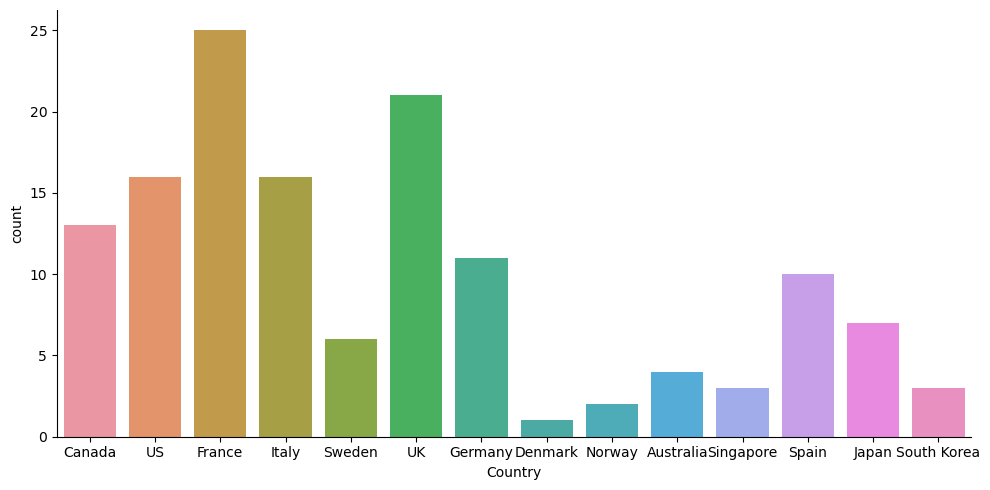

In [17]:
sns.catplot(x="Country", kind="count", data=df,aspect=2)
plt.show()

In [18]:
import seaborn as sns

C:\Users\range\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


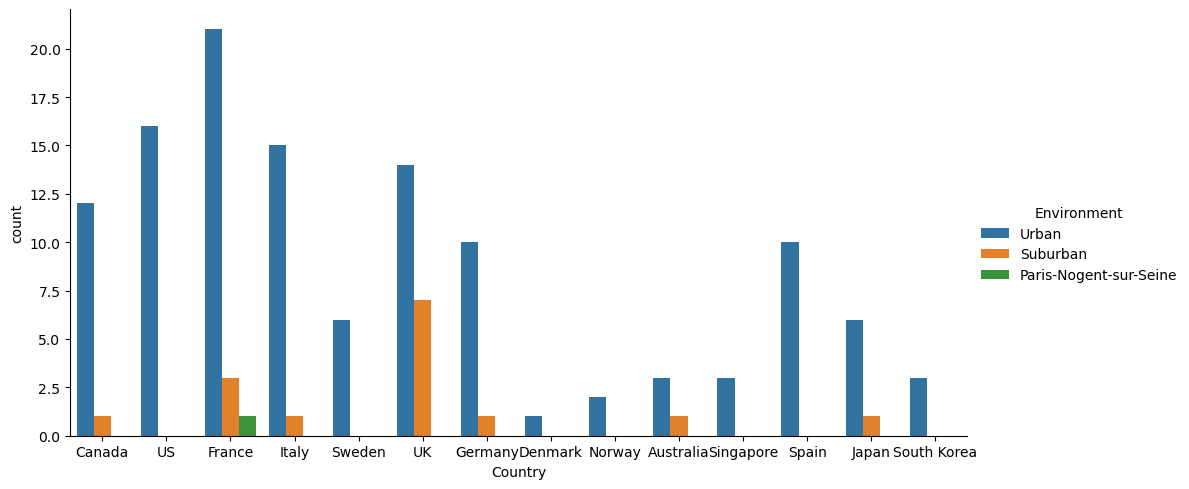

In [19]:
sns.catplot(x="Country", kind="count", data=df,aspect=2,hue='Environment')
plt.show()

C:\Users\range\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


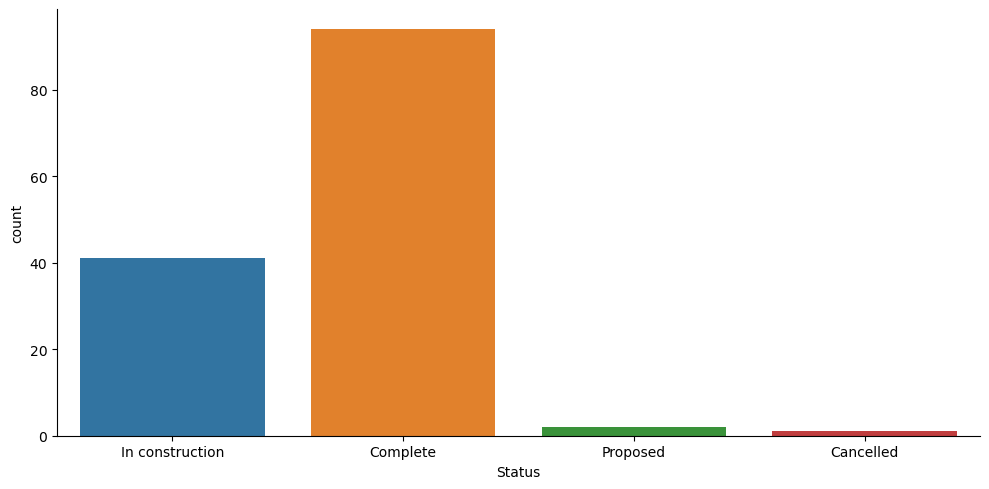

In [20]:
sns.catplot(x="Status", kind="count", data=df,aspect=2)
plt.show()

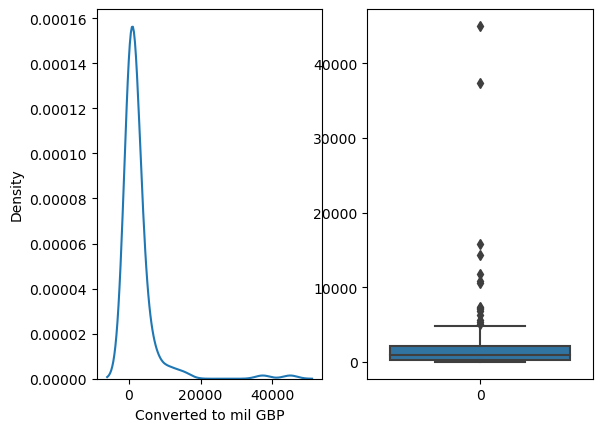

In [21]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(df['Converted to mil GBP'], ax=axes[0])
sns.boxplot(df['Converted to mil GBP'], ax=axes[1])
plt.show()

In [44]:
def remove_outlier_IQR(df, column):
    
    
    sorts = df[column].sort_values()
    
    Q1 = sorts.quantile(0.25)    
    Q3 = sorts.quantile(0.75)    
    IQR = Q3 - Q1
    
    lower_bound = sorts < (Q1-1.5*IQR)
    upper_bound = sorts > (Q3+1.5*IQR)
    
    df_final = df[~((lower_bound) | (upper_bound))].reset_index(drop=True)    
    
    return df_final


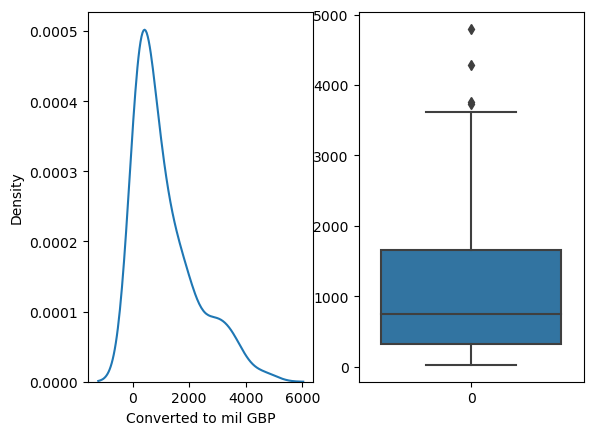

In [24]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(data['Converted to mil GBP'], ax=axes[0])
sns.boxplot(data['Converted to mil GBP'], ax=axes[1])
plt.show()

C:\Users\range\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


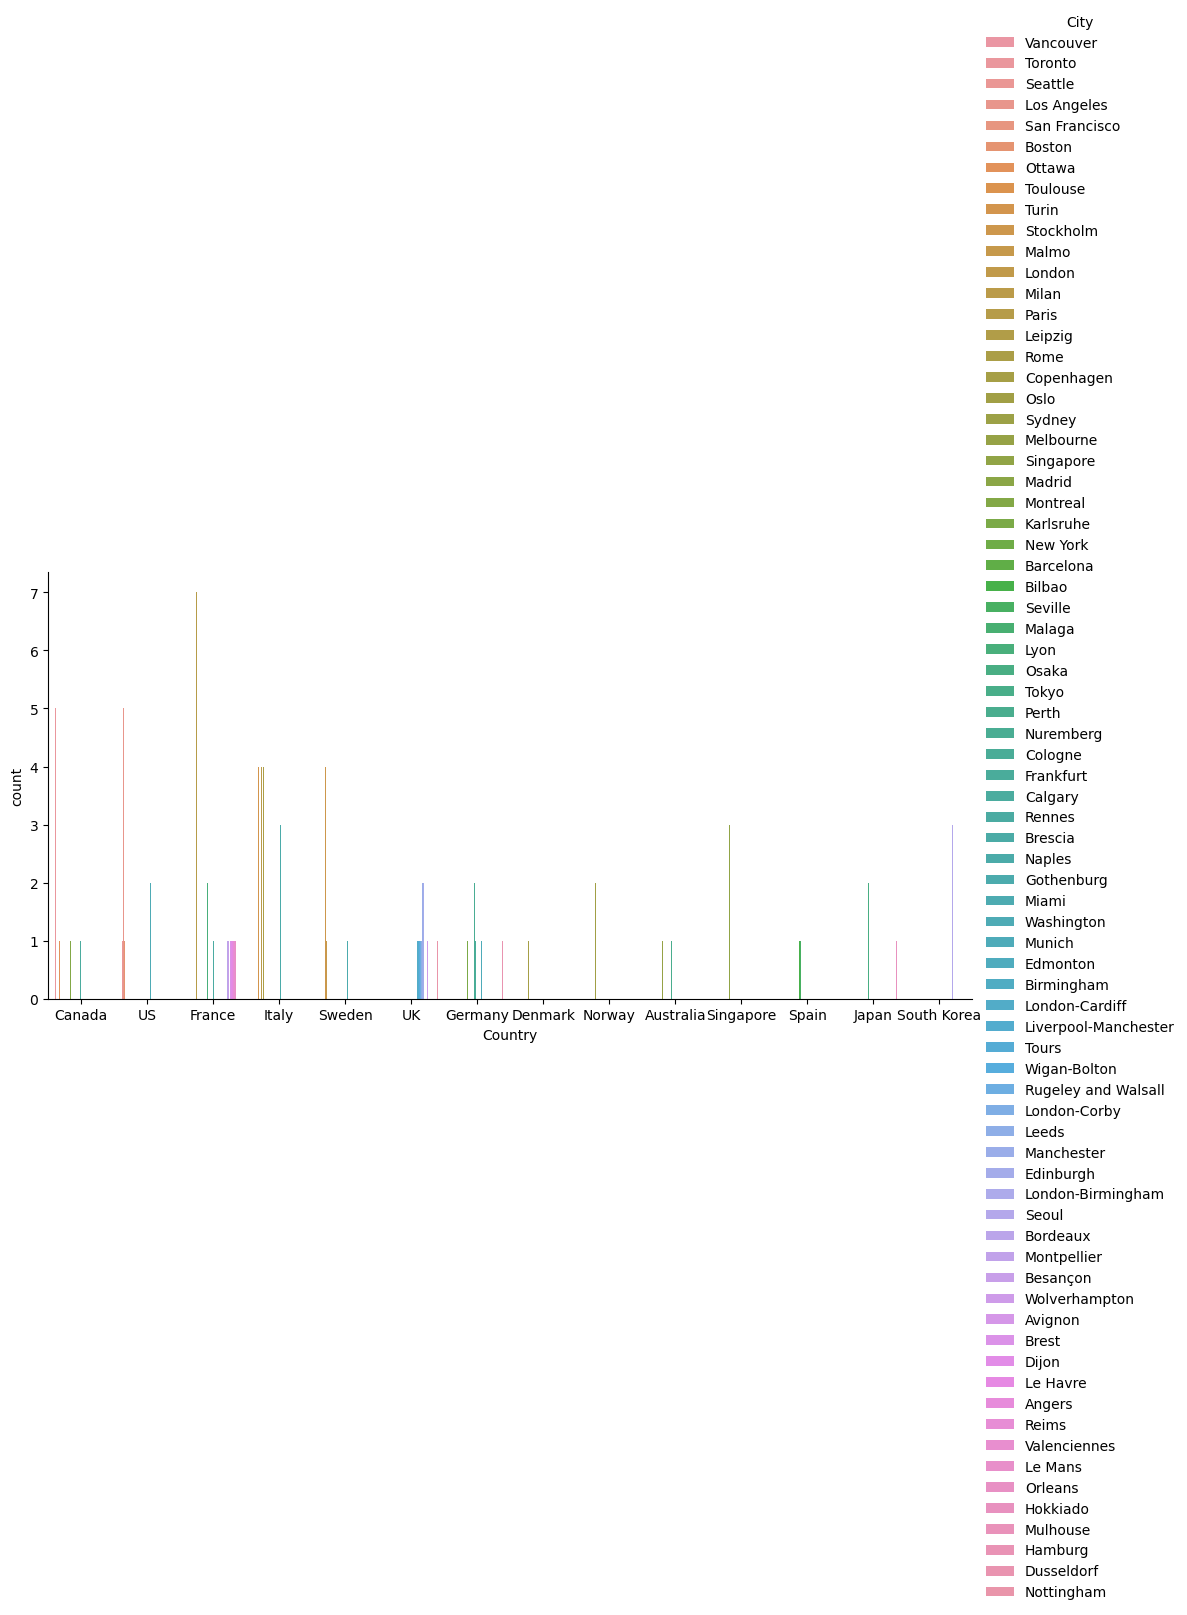

In [25]:
sns.catplot(x="Country", kind="count", data=df,aspect=2,hue='City')
plt.show()

In [45]:
df.fillna(method='bfill',inplace=True)

In [46]:
df.fillna(method='ffill',inplace=True)

In [28]:
df.columns[df.isnull().sum() > 0]

Index([], dtype='object')

In [55]:
df["Start Construction"].unique()

array(['2020', '2009', '2023', '2022', '2018', '2014', '2012', '2013',
       '2000', '2007', '2005', '2015', '2010', '2017', '2003', '2008',
       '2011', '1993', '1999', '2001', '2019', '2016', '2006', '1997',
       '2021', '1998', '2024', '2002', 0, '1996', '1995'], dtype=object)

In [59]:
df["duration"]=df["End Year"]-df["Start Construction"]


In [42]:
df.dtypes

Project title               object
Country                     object
City                        object
Environment                 object
Line name                   object
Description                 object
Status                      object
Start planning              object
Start Construction           int32
End Year                     int32
Length (Miles)             float64
Number of Stations           int64
Type of project             object
Type of Line                object
Tunnelling method           object
Tunnel percentage           object
Elevated percentage         object
Source                      object
Cost (m)                   float64
Currency                    object
Year                         int64
Converted to mil GBP         int64
CPI adjusted (mil GBP)       int64
Cost per mile (mil GBP)      int64
Source 1                    object
Source 2                    object
duration                     int32
dtype: object

In [112]:
df

,Project title,Country,City,Environment,Line name,Description,Status,Start planning,Start Construction,End Year,...,Source,Cost (m),Currency,Year,Converted to mil GBP,CPI adjusted (mil GBP),Cost per mile (mil GBP),Source 1,Source 2,duration
0,Broadway,Canada,Vancouver,Urban,Millenium,Extension of existing millennium line to add i...,In construction,2018,2020,2025,...,Database,2830.0,CAD,2018,1637,1966,555,https://transitcosts.com/vancouver-broadway-2/,NaN,5
1,Vaughan,Canada,Toronto,Urban,Line 1,Extension of existing line to a new terminus,Complete,2005,2009,2017,...,Database,3200.0,CAD,2013,1985,2566,480,https://transitcosts.com/toronto-vaughan/,NaN,8
2,Scarborough,Canada,Toronto,Urban,Line 2,Will extend existing subway to the city of Sca...,In construction,2020,2023,2030,...,Database,5500.0,CAD,2018,3180,3821,789,https://transitcosts.com/toronto-scarborough-2/,NaN,7
3,Ontario,Canada,Toronto,Urban,Ontario Line,New line through the centre of Toronto,In construction,2019,2022,2031,...,Database,19000.0,CAD,2022,11820,12884,1338,https://transitcosts.com/toronto-ontario-2/,https://www.thestar.com/news/gta/2022/11/23/on...,9
4,Yonge to Richmond Hill,Canada,Toronto,Urban,Line 1,Extending an existing line to new suburbs,In construction,2021,2023,2030,...,Database,5600.0,CAD,2020,3256,3778,822,https://transitcosts.com/toronto-yonge-to-rich...,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Extension to Bourtzwiller,France,Mulhouse,Urban,Mulhouse Tram,Construction of an extension of the existing line,Complete,?,2007,2009,...,Media,25.5,EUR,2009,23,33,35,https://www.railwaygazette.com/mulhouse-tram-l...,NaN,2
134,U4 to Eibbrucken,Germany,Hamburg,Urban,U4,Extension of the existing line,Complete,2013,2014,2018,...,Database,178.0,EUR,2016,146,183,227,https://transitcosts.com/hamburg-u4-to-elbbruc...,NaN,4
135,U4 to HafenCity U,Germany,Hamburg,Urban,U4,Extension of the existing line,Complete,?,2007,2012,...,Database,326.0,EUR,2009,290,420,173,https://transitcosts.com/hamburg-u4-to-hafenci...,NaN,5
136,Wehrhahn line,Germany,Dusseldorf,Urban,Wehrhahn Line,Construction of a new metro for Dusseldorf tha...,Complete,?,2007,2016,...,Database,929.0,EUR,2012,753,998,472,https://transitcosts.com/dusseldorf-wehrhahn-l...,NaN,9


In [50]:
df["End Year"].replace(['?'],0 ,inplace=True)

In [58]:
df["Start Construction"]=df["Start Construction"].astype(int)

C:\Users\range\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


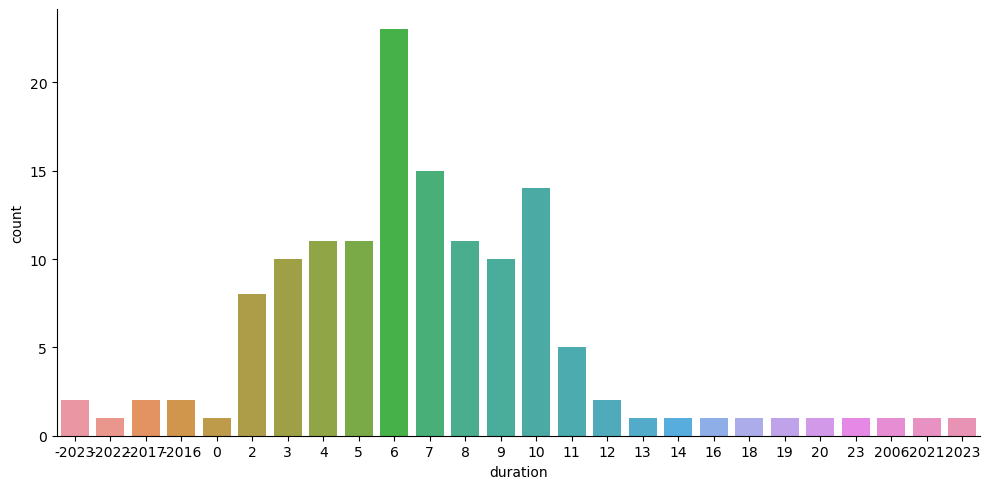

In [60]:
sns.catplot(x="duration", kind="count", data=df,aspect=2)
plt.show()

In [61]:
data = remove_outlier_IQR(df, "duration")

C:\Users\range\AppData\Local\Temp\ipykernel_10004\3963896361.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_final = df[~((lower_bound) | (upper_bound))].reset_index(drop=True)


C:\Users\range\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


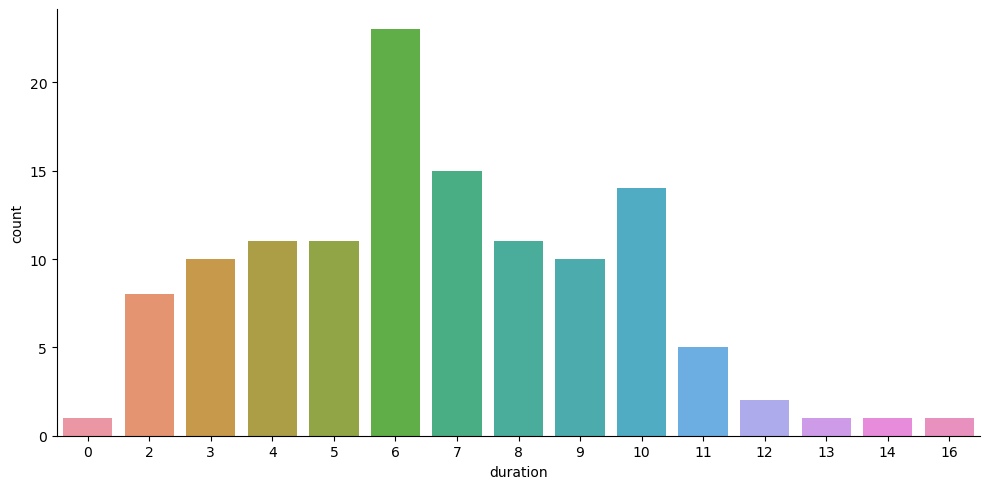

In [62]:
sns.catplot(x="duration", kind="count", data=data,aspect=2)
plt.show()

In [63]:
data

,Project title,Country,City,Environment,Line name,Description,Status,Start planning,Start Construction,End Year,...,Source,Cost (m),Currency,Year,Converted to mil GBP,CPI adjusted (mil GBP),Cost per mile (mil GBP),Source 1,Source 2,duration
0,Broadway,Canada,Vancouver,Urban,Millenium,Extension of existing millennium line to add i...,In construction,2018,2020,2025,...,Database,2830.0,CAD,2018,1637,1966,555,https://transitcosts.com/vancouver-broadway-2/,https://www.thestar.com/news/gta/2022/11/23/on...,5
1,Vaughan,Canada,Toronto,Urban,Line 1,Extension of existing line to a new terminus,Complete,2005,2009,2017,...,Database,3200.0,CAD,2013,1985,2566,480,https://transitcosts.com/toronto-vaughan/,https://www.thestar.com/news/gta/2022/11/23/on...,8
2,Scarborough,Canada,Toronto,Urban,Line 2,Will extend existing subway to the city of Sca...,In construction,2020,2023,2030,...,Database,5500.0,CAD,2018,3180,3821,789,https://transitcosts.com/toronto-scarborough-2/,https://www.thestar.com/news/gta/2022/11/23/on...,7
3,Ontario,Canada,Toronto,Urban,Ontario Line,New line through the centre of Toronto,In construction,2019,2022,2031,...,Database,19000.0,CAD,2022,11820,12884,1338,https://transitcosts.com/toronto-ontario-2/,https://www.thestar.com/news/gta/2022/11/23/on...,9
4,Yonge to Richmond Hill,Canada,Toronto,Urban,Line 1,Extending an existing line to new suburbs,In construction,2021,2023,2030,...,Database,5600.0,CAD,2020,3256,3778,822,https://transitcosts.com/toronto-yonge-to-rich...,https://commonwealthmagazine.org/transportatio...,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Extension to Bourtzwiller,France,Mulhouse,Urban,Mulhouse Tram,Construction of an extension of the existing line,Complete,?,2007,2009,...,Media,25.5,EUR,2009,23,33,35,https://www.railwaygazette.com/mulhouse-tram-l...,https://www.expressandstar.com/news/transport/...,2
120,U4 to Eibbrucken,Germany,Hamburg,Urban,U4,Extension of the existing line,Complete,2013,2014,2018,...,Database,178.0,EUR,2016,146,183,227,https://transitcosts.com/hamburg-u4-to-elbbruc...,https://www.expressandstar.com/news/transport/...,4
121,U4 to HafenCity U,Germany,Hamburg,Urban,U4,Extension of the existing line,Complete,?,2007,2012,...,Database,326.0,EUR,2009,290,420,173,https://transitcosts.com/hamburg-u4-to-hafenci...,https://www.expressandstar.com/news/transport/...,5
122,Wehrhahn line,Germany,Dusseldorf,Urban,Wehrhahn Line,Construction of a new metro for Dusseldorf tha...,Complete,?,2007,2016,...,Database,929.0,EUR,2012,753,998,472,https://transitcosts.com/dusseldorf-wehrhahn-l...,https://www.expressandstar.com/news/transport/...,9


In [64]:
data["Converted to mil GBP"].dtype

dtype('int64')

In [81]:
del data["Source 2"]

In [82]:
data

,Country,Environment,Status,Length (Miles),Number of Stations,Type of project,Type of Line,Tunnelling method,Tunnel percentage,Elevated percentage,Converted to mil GBP,duration
0,Canada,Urban,In construction,3.54,6,Line extension,Medium-capacity rapid transit,Tunnel Boring Machine,88%,5%,1637,5
1,Canada,Urban,Complete,5.34,6,Line extension,Metro/Underground,Tunnel Boring Machine,100%,0%,1985,8
2,Canada,Urban,In construction,4.84,3,Line extension,Metro/Underground,Tunnel Boring Machine,100%,0%,3180,7
3,Canada,Urban,In construction,9.63,15,New Line,Metro/Underground,Tunnel Boring Machine,57%,37%,11820,9
4,Canada,Urban,In construction,4.60,6,Line extension,Metro/Underground,Tunnel Boring Machine,100%,0%,3256,7
...,...,...,...,...,...,...,...,...,...,...,...,...
119,France,Urban,Complete,0.93,3,Line extension,Tram,Tunnel Boring Machine,0%,0%,23,2
120,Germany,Urban,Complete,0.81,1,Line extension,Metro/Underground,Tunnel Boring Machine,100%,0%,146,4
121,Germany,Urban,Complete,2.42,2,Line extension,Metro/Underground,Tunnel Boring Machine,100%,0%,290,5
122,Germany,Urban,Complete,2.11,6,New Line,Metro/Underground,Tunnel Boring Machine,100%,0%,753,9


In [83]:
data.isna().sum()

Country                 0
Environment             0
Status                  0
Length (Miles)          0
Number of Stations      0
Type of project         0
Type of Line            0
Tunnelling method       0
Tunnel percentage       0
Elevated percentage     0
Converted to mil GBP    0
duration                0
dtype: int64

In [91]:
data.dtypes

Country                  object
Environment              object
Status                   object
Length (Miles)          float64
Number of Stations        int64
Type of project          object
Type of Line             object
Tunnelling method        object
Tunnel percentage       float64
Elevated percentage     float64
Converted to mil GBP      int64
duration                  int32
dtype: object

In [90]:
data["Elevated percentage"] = data["Elevated percentage"].str.replace('%','')
data["Elevated percentage"]=data["Elevated percentage"].astype(float)

In [95]:
x1 = pd.get_dummies(data["Country"])

In [96]:
x1

,Australia,Canada,Denmark,France,Germany,Italy,Japan,Norway,Singapore,South Korea,Spain,Sweden,UK,US
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,False,False,False,True,False,False,False,False,False,False,False,False,False,False
120,False,False,False,False,True,False,False,False,False,False,False,False,False,False
121,False,False,False,False,True,False,False,False,False,False,False,False,False,False
122,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [98]:
code = {False:0, True:1 }
for i in x1:
    x1[i] = x1[i].apply(lambda x : code[x])

x1

,Australia,Canada,Denmark,France,Germany,Italy,Japan,Norway,Singapore,South Korea,Spain,Sweden,UK,US
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,0,1,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0,1,0,0,0,0,0,0,0,0,0
121,0,0,0,0,1,0,0,0,0,0,0,0,0,0
122,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [99]:
x2 = pd.get_dummies(data["Environment"])

In [100]:
code = {False:0, True:1 }
for i in x2:
    x2[i] = x2[i].apply(lambda x : code[x])

x2

,Paris-Nogent-sur-Seine,Suburban,Urban
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
119,0,0,1
120,0,0,1
121,0,0,1
122,0,0,1


In [101]:
del x2["Paris-Nogent-sur-Seine"]

In [102]:
x2

,Suburban,Urban
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
119,0,1
120,0,1
121,0,1
122,0,1


In [103]:
x3 = pd.get_dummies(data["Type of project"])
code = {False:0, True:1 }
for i in x3:
    x3[i] = x3[i].apply(lambda x : code[x])

x3

,Electrification,Line extension,New Line,New tunnel
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
119,0,1,0,0
120,0,1,0,0
121,0,1,0,0
122,0,0,1,0


In [104]:
x4 = pd.get_dummies(data["Type of Line"])
code = {False:0, True:1 }
for i in x4:
    x4[i] = x4[i].apply(lambda x : code[x])

x4

,Light Rail,Medium-capacity rapid transit,Metro/Underground,Tram,heavy rail
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
119,0,0,0,1,0
120,0,0,1,0,0
121,0,0,1,0,0
122,0,0,1,0,0


In [106]:
x5 = pd.get_dummies(data["Tunnelling method"])
code = {False:0, True:1 }
for i in x5:
    x5[i] = x5[i].apply(lambda x : code[x])

x5

,?,Cut and cover,Drill and Blast,Tunnel Boring Machine
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
119,0,0,0,1
120,0,0,0,1
121,0,0,0,1
122,0,0,0,1


In [107]:
del x5["?"]

In [108]:
x5

,Cut and cover,Drill and Blast,Tunnel Boring Machine
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
119,0,0,1
120,0,0,1
121,0,0,1
122,0,0,1


In [110]:
data.head()

,Country,Environment,Status,Length (Miles),Number of Stations,Type of project,Type of Line,Tunnelling method,Tunnel percentage,Elevated percentage,Converted to mil GBP,duration
0,Canada,Urban,In construction,3.54,6,Line extension,Medium-capacity rapid transit,Tunnel Boring Machine,88.0,5.0,1637,5
1,Canada,Urban,Complete,5.34,6,Line extension,Metro/Underground,Tunnel Boring Machine,100.0,0.0,1985,8
2,Canada,Urban,In construction,4.84,3,Line extension,Metro/Underground,Tunnel Boring Machine,100.0,0.0,3180,7
3,Canada,Urban,In construction,9.63,15,New Line,Metro/Underground,Tunnel Boring Machine,57.0,37.0,11820,9
4,Canada,Urban,In construction,4.60,6,Line extension,Metro/Underground,Tunnel Boring Machine,100.0,0.0,3256,7


In [117]:
del data["Tunnelling method"]

In [118]:
data

,Length (Miles),Number of Stations,Tunnel percentage,Elevated percentage,Converted to mil GBP,duration
0,3.54,6,88.0,5.0,1637,5
1,5.34,6,100.0,0.0,1985,8
2,4.84,3,100.0,0.0,3180,7
3,9.63,15,57.0,37.0,11820,9
4,4.60,6,100.0,0.0,3256,7
...,...,...,...,...,...,...
119,0.93,3,0.0,0.0,23,2
120,0.81,1,100.0,0.0,146,4
121,2.42,2,100.0,0.0,290,5
122,2.11,6,100.0,0.0,753,9


In [123]:
data = data.join(x5)

In [124]:
data

,Length (Miles),Number of Stations,Tunnel percentage,Elevated percentage,Converted to mil GBP,duration,Australia,Canada,Denmark,France,...,New Line,New tunnel,Light Rail,Medium-capacity rapid transit,Metro/Underground,Tram,heavy rail,Cut and cover,Drill and Blast,Tunnel Boring Machine
0,3.54,6,88.0,5.0,1637,5,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,5.34,6,100.0,0.0,1985,8,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,4.84,3,100.0,0.0,3180,7,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,9.63,15,57.0,37.0,11820,9,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4,4.60,6,100.0,0.0,3256,7,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.93,3,0.0,0.0,23,2,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
120,0.81,1,100.0,0.0,146,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
121,2.42,2,100.0,0.0,290,5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
122,2.11,6,100.0,0.0,753,9,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [125]:
data.dtypes

Length (Miles)                   float64
Number of Stations                 int64
Tunnel percentage                float64
Elevated percentage              float64
Converted to mil GBP               int64
duration                           int32
Australia                          int64
Canada                             int64
Denmark                            int64
France                             int64
Germany                            int64
Italy                              int64
Japan                              int64
Norway                             int64
Singapore                          int64
South Korea                        int64
Spain                              int64
Sweden                             int64
UK                                 int64
US                                 int64
Suburban                           int64
Urban                              int64
Electrification                    int64
Line extension                     int64
New Line        

In [126]:
x=data
y=data['Converted to mil GBP']

In [128]:
del x['Converted to mil GBP']

In [129]:
x

,Length (Miles),Number of Stations,Tunnel percentage,Elevated percentage,duration,Australia,Canada,Denmark,France,Germany,...,New Line,New tunnel,Light Rail,Medium-capacity rapid transit,Metro/Underground,Tram,heavy rail,Cut and cover,Drill and Blast,Tunnel Boring Machine
0,3.54,6,88.0,5.0,5,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,5.34,6,100.0,0.0,8,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,4.84,3,100.0,0.0,7,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,9.63,15,57.0,37.0,9,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,4.60,6,100.0,0.0,7,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.93,3,0.0,0.0,2,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
120,0.81,1,100.0,0.0,4,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
121,2.42,2,100.0,0.0,5,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
122,2.11,6,100.0,0.0,9,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1


In [130]:
xtrn,xtst,ytrn,ytst=train_test_split(x,y,test_size=0.3)

In [213]:
xtrn[["Length (Miles)","Number of Stations","Tunnel percentage","Elevated percentage","duration"]]=std.fit_transform(xtrn[["Length (Miles)","Number of Stations","Tunnel percentage","Elevated percentage","duration"]])

In [134]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Length (Miles)                 124 non-null    float64
 1   Number of Stations             124 non-null    int64  
 2   Tunnel percentage              124 non-null    float64
 3   Elevated percentage            124 non-null    float64
 4   duration                       124 non-null    int32  
 5   Australia                      124 non-null    int64  
 6   Canada                         124 non-null    int64  
 7   Denmark                        124 non-null    int64  
 8   France                         124 non-null    int64  
 9   Germany                        124 non-null    int64  
 10  Italy                          124 non-null    int64  
 11  Japan                          124 non-null    int64  
 12  Norway                         124 non-null    int

In [214]:
xtst[["Length (Miles)","Number of Stations","Tunnel percentage","Elevated percentage","duration"]]=std.transform(xtst[["Length (Miles)","Number of Stations","Tunnel percentage","Elevated percentage","duration"]])

In [140]:
from keras_tuner.tuners import RandomSearch

Using TensorFlow backend


In [142]:
from keras.layers import Dense,Input


In [215]:
def modelss(hp):      
    model = Sequential()
    model.add(Input(shape = (33,)))

    for i in range(hp.Int("hidden_layers", min_value = 5, max_value = 50)):
        model.add(Dense(units = hp.Int("neurons{}".format(i), min_value = 4, max_value = 75),activation= "relu"))

    model.add(Dense(1,activation="linear"))
    model.compile(optimizer=hp.Choice("optimizer", values = ["sgd","adam","adadelta","rmsprop"]),loss="binary_crossentropy",metrics=["accuracy"])
    
    return model

In [218]:
tuner = k.RandomSearch(modelss, objective = "val_accuracy", max_trials = 5, directory = r"C:\Users\range\Downloads\archive (18)/mj", project_name = "f4")   

In [192]:
tuner.search_space_summary()

Search space summary
Default search space size: 18
hidden_layers (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
neurons4 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'sgd', 'conditions': [], 'values': ['sgd', 'adam', 'adadelta', 'rmsprop'], 'ordered': False}
neurons5 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
n

In [193]:
tuner.results_summary()

Results summary
Results in C:\Users\range\Downloads\archive (18)/j\f4
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
hidden_layers: 15
neurons0: 37
neurons1: 14
neurons2: 47
neurons3: 38
neurons4: 12
optimizer: adadelta
neurons5: 4
neurons6: 4
neurons7: 4
neurons8: 4
neurons9: 4
neurons10: 4
neurons11: 4
neurons12: 4
neurons13: 4
neurons14: 4
Score: 0.0

Trial 1 summary
Hyperparameters:
hidden_layers: 6
neurons0: 40
neurons1: 36
neurons2: 20
neurons3: 37
neurons4: 35
optimizer: rmsprop
neurons5: 26
neurons6: 49
neurons7: 28
neurons8: 33
neurons9: 29
neurons10: 26
neurons11: 19
neurons12: 12
neurons13: 47
neurons14: 36
Score: 0.0

Trial 2 summary
Hyperparameters:
hidden_layers: 7
neurons0: 50
neurons1: 22
neurons2: 14
neurons3: 12
neurons4: 43
optimizer: sgd
neurons5: 46
neurons6: 21
neurons7: 18
neurons8: 29
neurons9: 16
neurons10: 34
neurons11: 38
neurons12: 16
neurons13: 49
neurons14: 21
Score: 0.0

Trial 3 summary
Hyperparame

In [194]:
tuner.get_best_hyperparameters()[0].values

{'hidden_layers': 15,
 'neurons0': 37,
 'neurons1': 14,
 'neurons2': 47,
 'neurons3': 38,
 'neurons4': 12,
 'optimizer': 'adadelta',
 'neurons5': 4,
 'neurons6': 4,
 'neurons7': 4,
 'neurons8': 4,
 'neurons9': 4,
 'neurons10': 4,
 'neurons11': 4,
 'neurons12': 4,
 'neurons13': 4,
 'neurons14': 4}

In [195]:
fmodel = tuner.get_best_models(num_models=1)[0]

In [196]:
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 37)                1258      
                                                                 
 dense_1 (Dense)             (None, 14)                532       
                                                                 
 dense_2 (Dense)             (None, 47)                705       
                                                                 
 dense_3 (Dense)             (None, 38)                1824      
                                                                 
 dense_4 (Dense)             (None, 12)                468       
                                                                 
 dense_5 (Dense)             (None, 4)                 52        
                                                                 
 dense_6 (Dense)             (None, 4)                 2